## Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import random

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold



/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Set Options

In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
sns.set_style('darkgrid')

random.seed(129)

# Combined Data

## Load Data

In [4]:
df = pickle.load(open('./clean_data/good_gk.pkl', 'rb'))

## Inspect Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 651
Data columns (total 25 columns):
Player                     579 non-null object
Club                       579 non-null object
POS                        579 non-null object
GP                         579 non-null float64
GS                         579 non-null float64
MINS                       579 non-null float64
SHTS                       579 non-null float64
SV                         579 non-null float64
GA                         579 non-null float64
GAA                        579 non-null float64
W                          579 non-null float64
L                          579 non-null float64
T                          579 non-null float64
ShO                        579 non-null float64
Wpct                       579 non-null float64
SvPct                      579 non-null float64
Year                       579 non-null int64
Season                     579 non-null object
PKG                        579 non-nu

In [6]:
pd.concat([df.head(5), df.tail(5)], axis=0)

Player Club POS    GP    GS    MINS   SHTS     SV    GA   GAA     W     L    T   ShO  Wpct  SvPct  Year Season  PKG  PKA Last Name First Name  Base Salary  Guaranteed Compensation        Date
0      Bouna Coundoul  COL  GK  30.0  30.0  2668.0  158.0  120.0  32.0  1.07   9.0  12.0  8.0   9.0  30.0   75.9  2007    REG  2.0  2.0  Coundoul      Bouna     30000.00                 30000.00  2007-08-31
1       Kevin Hartman   KC  GK  30.0  30.0  2700.0  159.0  110.0  45.0  1.50  11.0  12.0  7.0   5.0  36.7   69.2  2007    REG  6.0  7.0   Hartman      Kevin    150000.00                150000.00  2007-08-31
2           Matt Reis   NE  GK  30.0  30.0  2700.0  169.0  120.0  43.0  1.43  14.0   8.0  8.0  10.0  46.7   71.0  2007    REG  3.0  3.0      Reis       Matt    150000.00                150000.00  2007-08-31
3          Joe Cannon   LA  GK  29.0  29.0  2610.0  171.0  119.0  46.0  1.59   9.0  13.0  7.0   5.0  31.0   69.6  2007    REG  4.0  5.0    Cannon        Joe    192000.00                192000.00  2007-08-31
4        Troy Perkins   DC  GK  29.0  29.0  2610.0  155.0  117.0  32.0  1.10  16.0   6.0  7.0   8.0  55.2   75.5  2007    REG  1.0  3.0   Perkins       Troy     85000.00                 87500.00  2007-08-31
647  Kendall McIntosh  POR  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0  0.0   0.0   0.0    0.0  2017    REG  0.0  0.0  McIntosh    Kendall     53000.00                 53000.00  2017-04-15
648     Josh Saunders  ORL  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0  0.0   0.0   0.0    0.0  2017    REG  0.0  0.0  Saunders       Josh    150000.00                150000.00  2017-04-15
649     Eric Kronberg  MTL  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0  0.0   0.0   0.0    0.0  2017    REG  0.0  0.0  Kronberg       Eric     99999.96                104999.96  2017-04-15
650    Bryan Meredith  SEA  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0  0.0   0.0   0.0    0.0  2017    REG  0.0  0.0  Meredith      Bryan     66150.00                 66150.00  2017-04-15
651        Ryan Meara   NY  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0  0.0   0.0   0.0    0.0  2017    REG  0.0  0.0     Meara       Ryan    100008.00                105008.00  2017-04-15

In [7]:
df.sample(10, random_state=129)

Player Club POS    GP    GS    MINS   SHTS     SV    GA   GAA     W     L     T   ShO  Wpct  SvPct  Year Season  PKG  PKA  Last Name First Name  Base Salary  Guaranteed Compensation        Date
336      Joe Cannon  VAN  GK  10.0  10.0   900.0   42.0   31.0  14.0  1.40   3.0   4.0   3.0   1.0  30.0   73.8  2013    REG  0.0  0.0     Cannon        Joe     180500.0                189916.67  2013-05-01
520    Nick Rimando  RSL  GK  30.0  30.0  2700.0  137.0   91.0  40.0  1.33  11.0   9.0  10.0   6.0  36.7   66.4  2016    REG  3.0  5.0    Rimando       Nick     400000.0                420000.00  2016-05-15
439    Luis Soffner   NE  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0    0.0  2014    REG  0.0  0.0    Soffner       Luis      36500.0                 36500.00  2014-04-01
555    Kyle Reynish   NY  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0    0.0  2016    REG  0.0  0.0    Reynish       Kyle      62500.0                 62500.00  2016-05-15
2         Matt Reis   NE  GK  30.0  30.0  2700.0  169.0  120.0  43.0  1.43  14.0   8.0   8.0  10.0  46.7   71.0  2007    REG  3.0  3.0       Reis       Matt     150000.0                150000.00  2007-08-31
427  Marco Carducci  VAN  GK   0.0   0.0     0.0    0.0    0.0   0.0  0.00   0.0   0.0   0.0   0.0   0.0    0.0  2014    REG  0.0  0.0   Carducci      Marco      36504.0                 36504.00  2014-04-01
511      Joe Bendik  ORL  GK  34.0  34.0  3060.0  178.0  114.0  60.0  1.76   9.0  11.0  14.0   5.0  26.5   64.0  2016    REG  4.0  7.0     Bendik        Joe     140000.0                147666.67  2016-05-15
400     Tyler Deric  HOU  GK  11.0  10.0   910.0   53.0   36.0  14.0  1.40   3.0   5.0   2.0   3.0  27.3   67.9  2014    REG  2.0  3.0      Deric      Tyler      90000.0                 97666.67  2014-04-01
585  Jesse Gonzalez  DAL  GK  29.0  29.0  2610.0  118.0   75.0  40.0  1.38   8.0   8.0  13.0   9.0  27.6   63.6  2017    REG  1.0  1.0   Gonzalez      Jesse      85000.0                 94375.00  2017-04-15
327  Raul Fernandez  DAL  GK  26.0  26.0  2340.0  129.0   88.0  41.0  1.58   7.0  10.0   9.0   7.0  26.9   68.2  2013    REG  2.0  3.0  Fernandez       Raul     150000.0                237500.00  2013-05-01

## Fix Integer Column Dtypes

### Rename, Reorder, and Drop Columns

In [8]:
# Rename columns that have spaces in names
df.rename(columns={'Base Salary': 'Salary', 
                   'Guaranteed Compensation': 'Total', 
                   'First Name': 'First',
                   'Last Name': 'Last'}, inplace=True)
df['Log_Salary'] = df['Salary'].map(np.log)

In [10]:
df['Pts'] = df['W']*3 + df['L']*0 + df['T']*1
df['Wpct'] = (df['W'] + df['T'] * 0.5) / df[['W', 'L', 'T']].sum(axis=1) * 100
df['Intercept'] = pd.Series(np.ones((len(df), )))
# df = df.drop(columns=['W', 'L', 'T', 'Wpct'])

### Targeting Salary

In [14]:
df = df[['Player', 'Club', 'Salary', 'Log_Salary', 
         'Pts', 'Intercept', 'Year', 'GP', 'GS', 'MINS', 
         'SHTS', 'SV', 'GA', 'GAA', 'ShO', 'SvPct']]

In [15]:
df.head()

Player Club    Salary  Log_Salary   Pts  Intercept  Year    GP    GS    MINS   SHTS     SV    GA   GAA   ShO  SvPct
0  Bouna Coundoul  COL   30000.0   10.308953  35.0        1.0  2007  30.0  30.0  2668.0  158.0  120.0  32.0  1.07   9.0   75.9
1   Kevin Hartman   KC  150000.0   11.918391  40.0        1.0  2007  30.0  30.0  2700.0  159.0  110.0  45.0  1.50   5.0   69.2
2       Matt Reis   NE  150000.0   11.918391  50.0        1.0  2007  30.0  30.0  2700.0  169.0  120.0  43.0  1.43  10.0   71.0
3      Joe Cannon   LA  192000.0   12.165251  34.0        1.0  2007  29.0  29.0  2610.0  171.0  119.0  46.0  1.59   5.0   69.6
4    Troy Perkins   DC   85000.0   11.350407  55.0        1.0  2007  29.0  29.0  2610.0  155.0  117.0  32.0  1.10   8.0   75.5

In [22]:
corr = df.iloc[:, 3:].corr()

Text(0.5,1,'Correlation Heatmap')

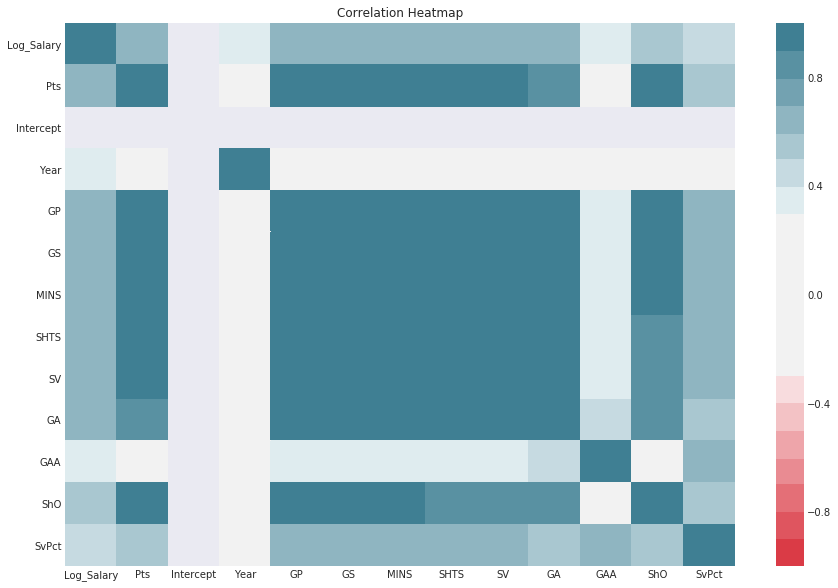

In [23]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr, center=0, cmap=sns.diverging_palette(10, 220, sep=80, n=20), vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5,1,'Pairplot Matrix')

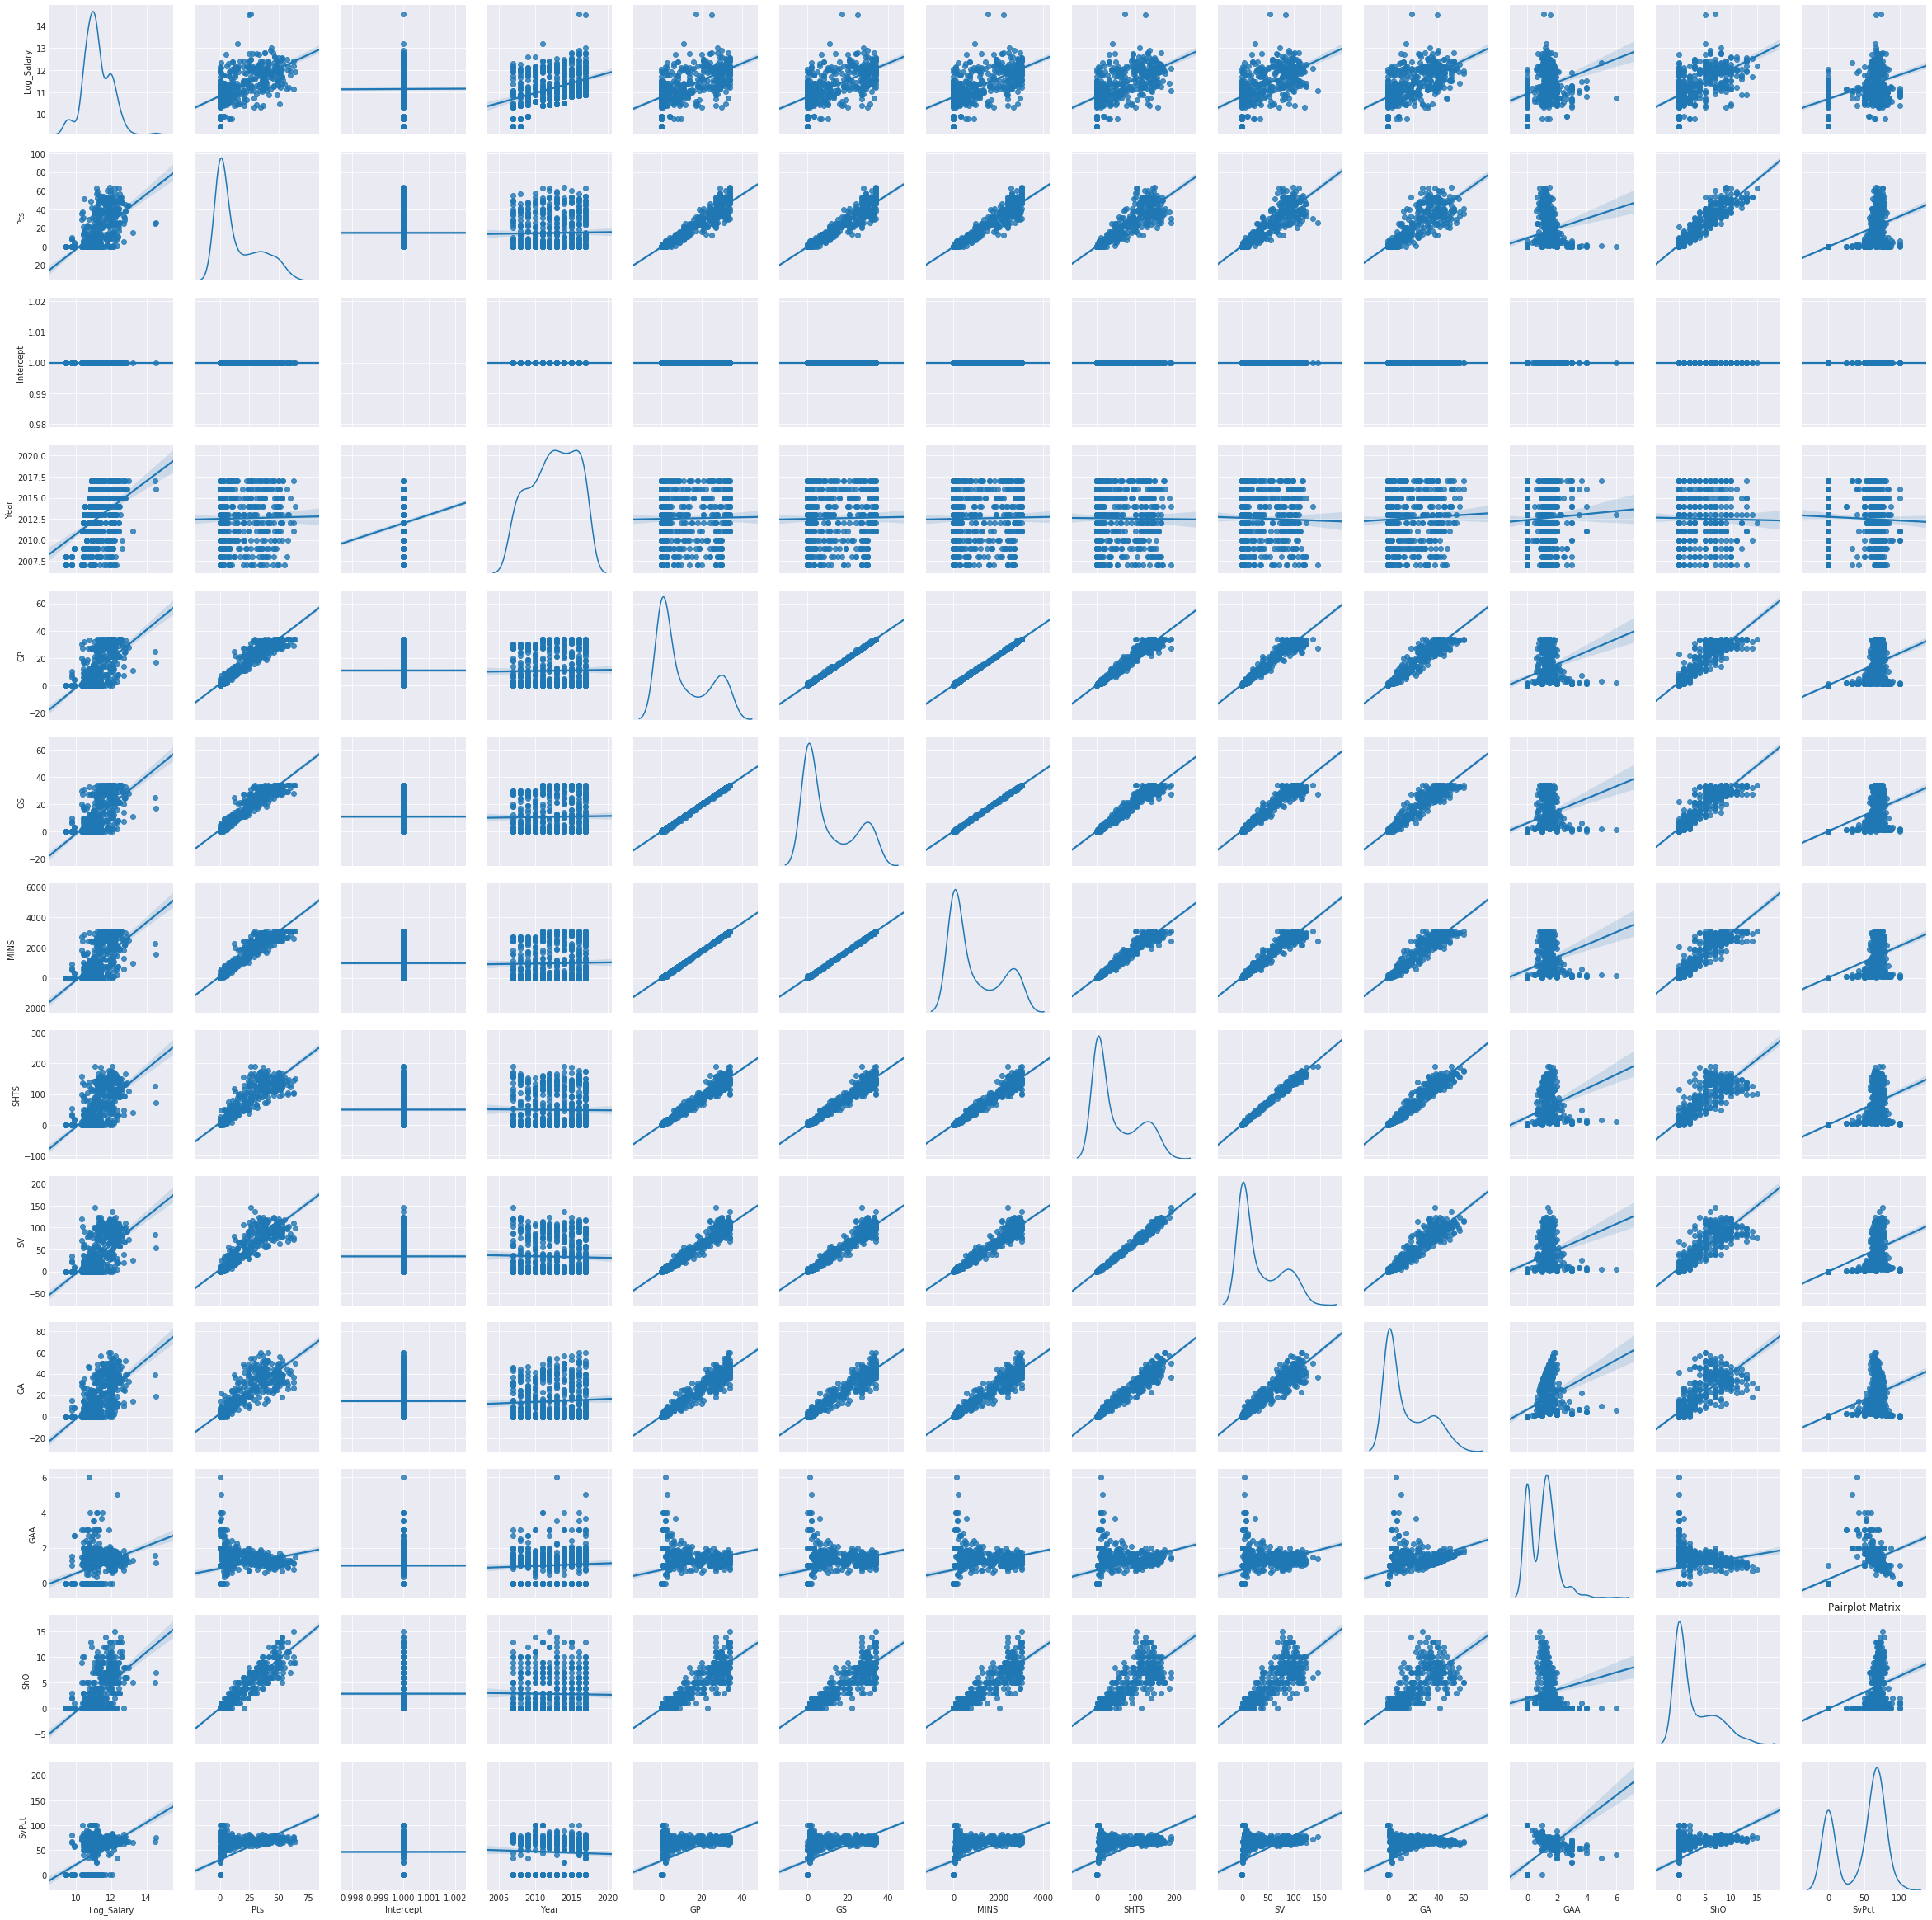

In [18]:
plt.figure(num=None)
# sns.pairplot(df.iloc[:, 3:])
sns.pairplot(df.iloc[:, 3:], diag_kind="kde", kind='reg')
plt.title('Pairplot Matrix')

In [24]:
# Setup the data
X = df.iloc[:, 5:]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

0    35.0
1    40.0
2    50.0
3    34.0
4    55.0
Name: Pts, dtype: float64

In [26]:
# Create your model
model = sm.OLS(y_train, X_train)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

/home/cneiderer/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

In [27]:
# Setup the data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 5:], df.iloc[:, 0], test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [348]:
# Setup the data
X = df.iloc[:, 5:]
# X['Intercept'] = np.ones((len(X), 1))
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=False)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.276e+04
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        08:23:59   Log-Likelihood:                -312.75
No. Observations:                 405   AIC:                             653.5
Df Residuals:                     391   BIC:                             709.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0053   2.26e-05    234.916      0.000       0.005       0.005
GP            -0.0059      0.093     -0.063      0.949      -0.189       0.177
GS             0.4506      0.111      4.058      0.000       0.232       0.669
MINS          -0.0058      0.002     -2.503      0.013      -0.010      -0.001
SHTS          -0.0140      0.018     -0.763      0.446      -0.050       0.022
SV             0.0068      0.019      0.359      0.720      -0.031       0.044
GA             0.0192      0.021      0.903      0.367      -0.023       0.061
GAA            0.0935      0.049      1.916      0.056      -0.002       0.189
W              0.1137      0.124      0.916      0.360      -0.130       0.358
L              0.1299      0.124      1.052      0.294      -0.113       0.373
T              0.1058      0.124      0.851      0.395      -0.139       0.350
ShO            0.0250      0.028      0.884      0.377      -0.031       0.081
Wpct           0.0014      0.002      0.671      0.503      -0.003       0.005
SvPct          0.0008      0.002      0.470      0.638      -0.003       0.004
==============================================================================
Omnibus:                       23.394   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.043
Skew:                           0.079   Prob(JB):                     2.27e-16
Kurtosis:                       5.060   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

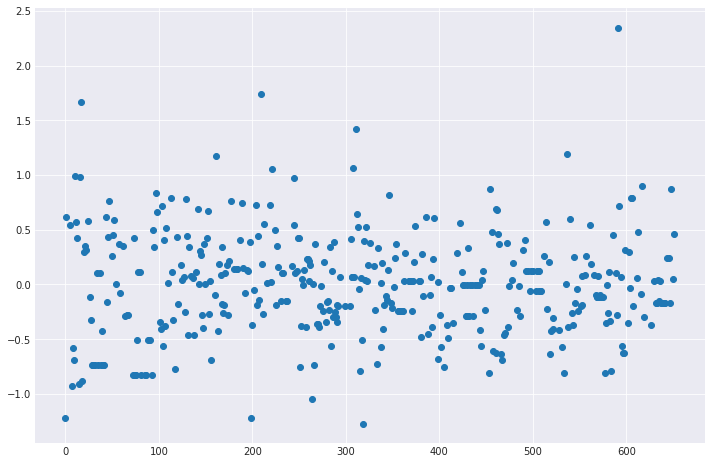

In [87]:
fit.resid.plot(style='o', figsize=(12,8));

In [344]:
# Setup the data
X = df3.iloc[:, 5:]
# X = df3.iloc[:, 19:]
# X['Intercept'] = np.ones((len(X), 1))
y = df3.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=False)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7857.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        08:22:28   Log-Likelihood:                -263.22
No. Observations:                 405   AIC:                             582.4
Df Residuals:                     377   BIC:                             694.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0962      0.010     10.083      0.000       0.077       0.115
GP            -0.2175      0.146     -1.485      0.138      -0.505       0.070
GS             0.5583      0.126      4.417      0.000       0.310       0.807
MINS          -0.0047      0.002     -1.905      0.058      -0.009       0.000
SHTS          -0.0005      0.020     -0.027      0.978      -0.039       0.038
SV          8.596e-05      0.020      0.004      0.997      -0.040       0.040
GA             0.0027      0.026      0.104      0.917      -0.048       0.053
GAA            0.2789      0.251      1.111      0.267      -0.215       0.773
W             -0.0054      0.015     -0.352      0.725      -0.035       0.025
L              0.1074      0.130      0.823      0.411      -0.149       0.364
T              0.0385      0.087      0.444      0.658      -0.132       0.209
ShO            0.0638      0.040      1.591      0.113      -0.015       0.143
Wpct          -0.0012      0.005     -0.228      0.820      -0.011       0.009
SvPct         -0.0031      0.020     -0.154      0.878      -0.042       0.036
Pts            0.0223      0.046      0.482      0.630      -0.069       0.113
Log_Year     -24.0587      2.525     -9.528      0.000     -29.024     -19.093
Log_GP         0.6538      0.684      0.956      0.339      -0.690       1.998
Log_GS        -0.4904      0.383     -1.280      0.201      -1.243       0.263
Log_MINS       0.1268      0.325      0.390      0.697      -0.513       0.766
Log_SHTS       0.4555      1.305      0.349      0.727      -2.110       3.021
Log_SV        -0.3647      1.215     -0.300      0.764      -2.753       2.024
Log_GA        -0.3546      0.544     -0.651      0.515      -1.425       0.716
Log_GAA       -0.6817      0.931     -0.732      0.464      -2.512       1.149
Log_W          0.3031      0.329      0.920      0.358      -0.345       0.951
Log_L          0.0043      0.230      0.019      0.985      -0.449       0.457
Log_T          0.1340      0.212      0.633      0.527      -0.282       0.550
Log_ShO       -0.2719      0.185     -1.473      0.142      -0.635       0.091
Log_Wpct      -0.0295      0.090     -0.329      0.742      -0.206       0.147
Log_SvPct     -0.0105      0.261     -0.040      0.968      -0.524       0.503
==============================================================================
Omnibus:                       34.233   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.093
Skew:                           0.488   Prob(JB):                     1.64e-15
Kurtosis:                       4.756   Cond. No.                     1.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

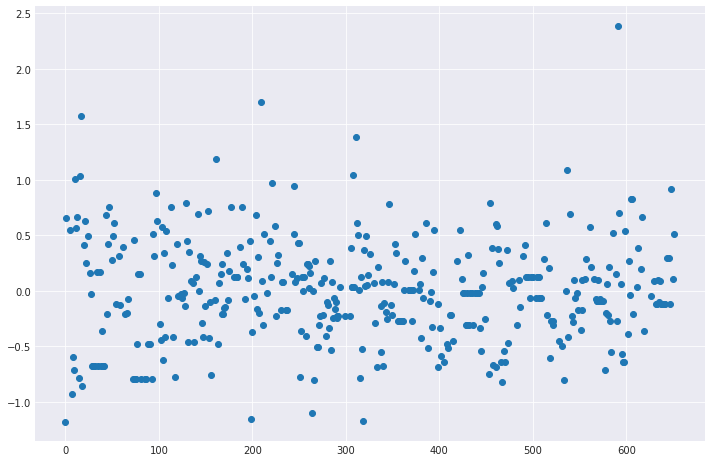

In [125]:
fit.resid.plot(style='o', figsize=(12,8));

In [127]:
est = make_pipeline(PolynomialFeatures(2, interaction_only=True), LinearRegression())
est.fit(X_train, y_train)
est.score(X_test, y_test)

-510.29832370387072

In [122]:
lr = LinearRegression(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.54525015180394409

In [129]:
lr = RidgeCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.45599335014795028

In [132]:
lr = LassoCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3675889312375864

In [137]:
lr = ElasticNetCV(l1_ratio=0.025, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3672897241787344

### Sandbox

In [206]:
df3.head()

Salary          Player Club POS  Log_Salary  Year    GP    GS    MINS   SHTS     SV    GA   GAA     W     L    T   ShO  Wpct  SvPct   Pts  Log_Year    Log_GP    Log_GS  Log_MINS  Log_SHTS    Log_SV    Log_GA   Log_GAA     Log_W     Log_L     Log_T   Log_ShO  Log_Wpct  Log_SvPct
0   30000.0  Bouna Coundoul  COL  GK   10.308953  2007  30.0  30.0  2668.0  158.0  120.0  32.0  1.07   9.0  12.0  8.0   9.0  30.0   75.9  43.0  7.604894  3.433987  3.433987  7.889459  5.068904  4.795791  3.496508  0.727549  2.302585  2.564949  2.197225  2.302585  3.433987   4.342506
1  150000.0   Kevin Hartman   KC  GK   11.918391  2007  30.0  30.0  2700.0  159.0  110.0  45.0  1.50  11.0  12.0  7.0   5.0  36.7   69.2  47.0  7.604894  3.433987  3.433987  7.901377  5.075174  4.709530  3.828641  0.916291  2.484907  2.564949  2.079442  1.791759  3.629660   4.251348
2  150000.0       Matt Reis   NE  GK   11.918391  2007  30.0  30.0  2700.0  169.0  120.0  43.0  1.43  14.0   8.0  8.0  10.0  46.7   71.0  58.0  7.604894  3.433987  3.433987  7.901377  5.135798  4.795791  3.784190  0.887891  2.708050  2.197225  2.197225  2.397895  3.864931   4.276666
3  192000.0      Joe Cannon   LA  GK   12.165251  2007  29.0  29.0  2610.0  171.0  119.0  46.0  1.59   9.0  13.0  7.0   5.0  31.0   69.6  41.0  7.604894  3.401197  3.401197  7.867489  5.147494  4.787492  3.850148  0.951658  2.302585  2.639057  2.079442  1.791759  3.465736   4.257030
4   85000.0    Troy Perkins   DC  GK   11.350407  2007  29.0  29.0  2610.0  155.0  117.0  32.0  1.10  16.0   6.0  7.0   8.0  55.2   75.5  62.0  7.604894  3.401197  3.401197  7.867489  5.049856  4.770685  3.496508  0.741937  2.833213  1.945910  2.079442  2.197225  4.028917   4.337291

In [333]:
# # Setup the data
# # X = df3.iloc[:, 5:]
# X = sm.add_constant(df[['GS', 'MINS', 'ShO']])
# # y = df3.iloc[:, 0]
# # y = df3['Salary']
# y = df3['Log_Salary']

# X = df3.iloc[:, 6]
# X = sm.add_constant(df3.iloc[:, 6])

df4 = df3[df3.GP > 0]
X = sm.add_constant(df4.iloc[:, list(np.arange(8,16)) + [17,18]])
y = df4['ShO'] #.map(lambda x: np.log(x+1))

In [ ]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr3, center=0, cmap=sns.diverging_palette(10, 220, sep=80, n=20), vmin=-1, vmax=1)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

# Create your model
model = sm.OLS(y_train, X_train, hasconst=True)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ShO   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          4.14e-139
Time:                        23:20:06   Log-Likelihood:                -398.33
No. Observations:                 273   AIC:                             818.7
Df Residuals:                     262   BIC:                             858.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3769      0.654     -0.576      0.565      -1.665       0.912
MINS           0.0103      0.003      3.905      0.000       0.005       0.015
SHTS           0.0170      0.037      0.454      0.650      -0.057       0.091
SV            -0.0206      0.040     -0.521      0.603      -0.099       0.057
GA            -0.2437      0.041     -5.982      0.000      -0.324      -0.163
GAA            0.1500      0.131      1.148      0.252      -0.107       0.407
W             -0.2711      0.237     -1.144      0.254      -0.738       0.196
L             -0.3951      0.236     -1.677      0.095      -0.859       0.069
T             -0.4268      0.236     -1.809      0.072      -0.891       0.038
Wpct           0.0005      0.004      0.122      0.903      -0.007       0.008
SvPct          0.0042      0.008      0.536      0.593      -0.011       0.020
==============================================================================
Omnibus:                       16.016   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.425
Skew:                          -0.090   Prob(JB):                     3.72e-10
Kurtosis:                       4.946   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

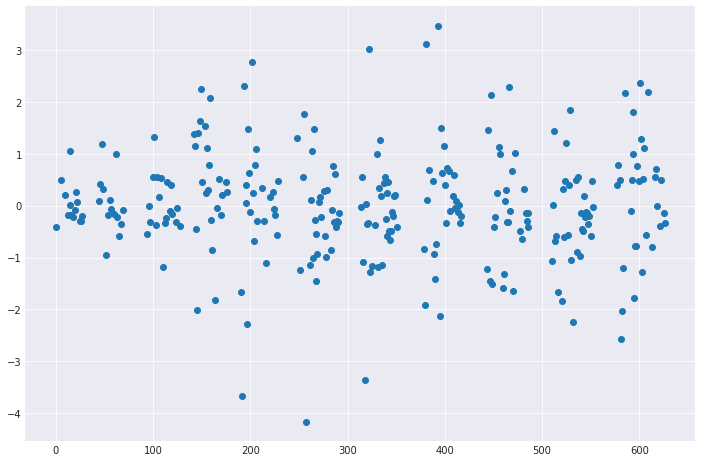

In [335]:
fit.resid.plot(style='o', figsize=(12,8));

In [336]:
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.88876471723618289

In [337]:
lr.score(X_train, y_train)

0.9223148348270952

In [305]:
lr.coef_

array([ 0.01030224,  0.01698408, -0.02063106, -0.24369175,  0.14998274,
       -0.27110555, -0.39514294, -0.42680907,  0.00049209,  0.00418963])

In [309]:
lr = RidgeCV(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.85094202760133797

In [310]:
lr.coef_

array([ 0.00098568,  0.00108389,  0.01049369, -0.04958947, -0.33195677,
        0.3473033 ,  0.02026308,  0.19322051,  0.00287858,  0.00508457])

In [311]:
lr = LassoCV(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.79719595343517557

In [312]:
X.columns

Index(['MINS', 'SHTS', 'SV', 'GA', 'GAA', 'W', 'L', 'T', 'Wpct', 'SvPct'], dtype='object')

In [313]:
lr.coef_

array([ 0.00375214, -0.01569282, -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.00018086,  0.        ])

In [314]:
lr = ElasticNetCV(l1_ratio=0.95, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.79716155294489188

Text(0,0.5,'ytest')

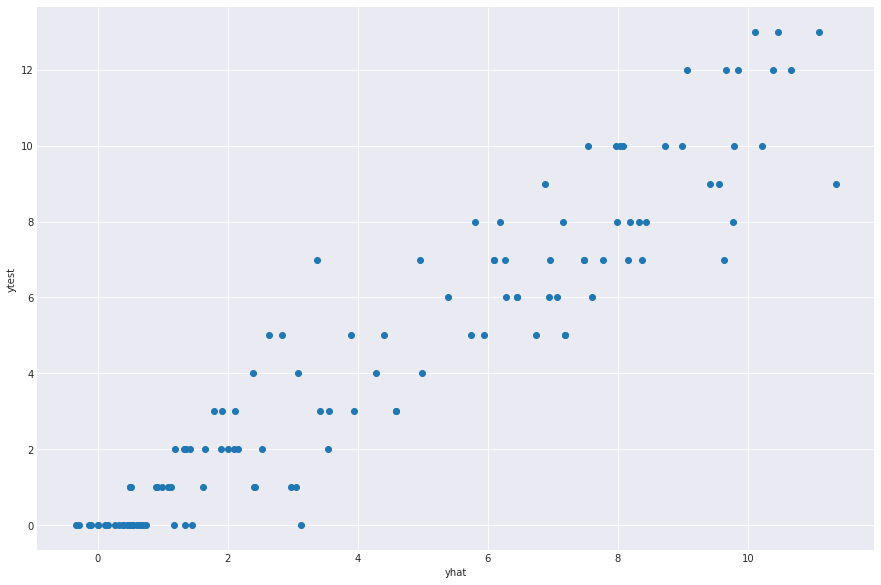

In [318]:
yhat = pd.Series(fit.predict(X_test), name='Pred_ShO')

plt.figure(num=None, figsize=(15, 10))
plt.scatter(yhat, y_test)
plt.xlabel('yhat')
plt.ylabel('ytest')

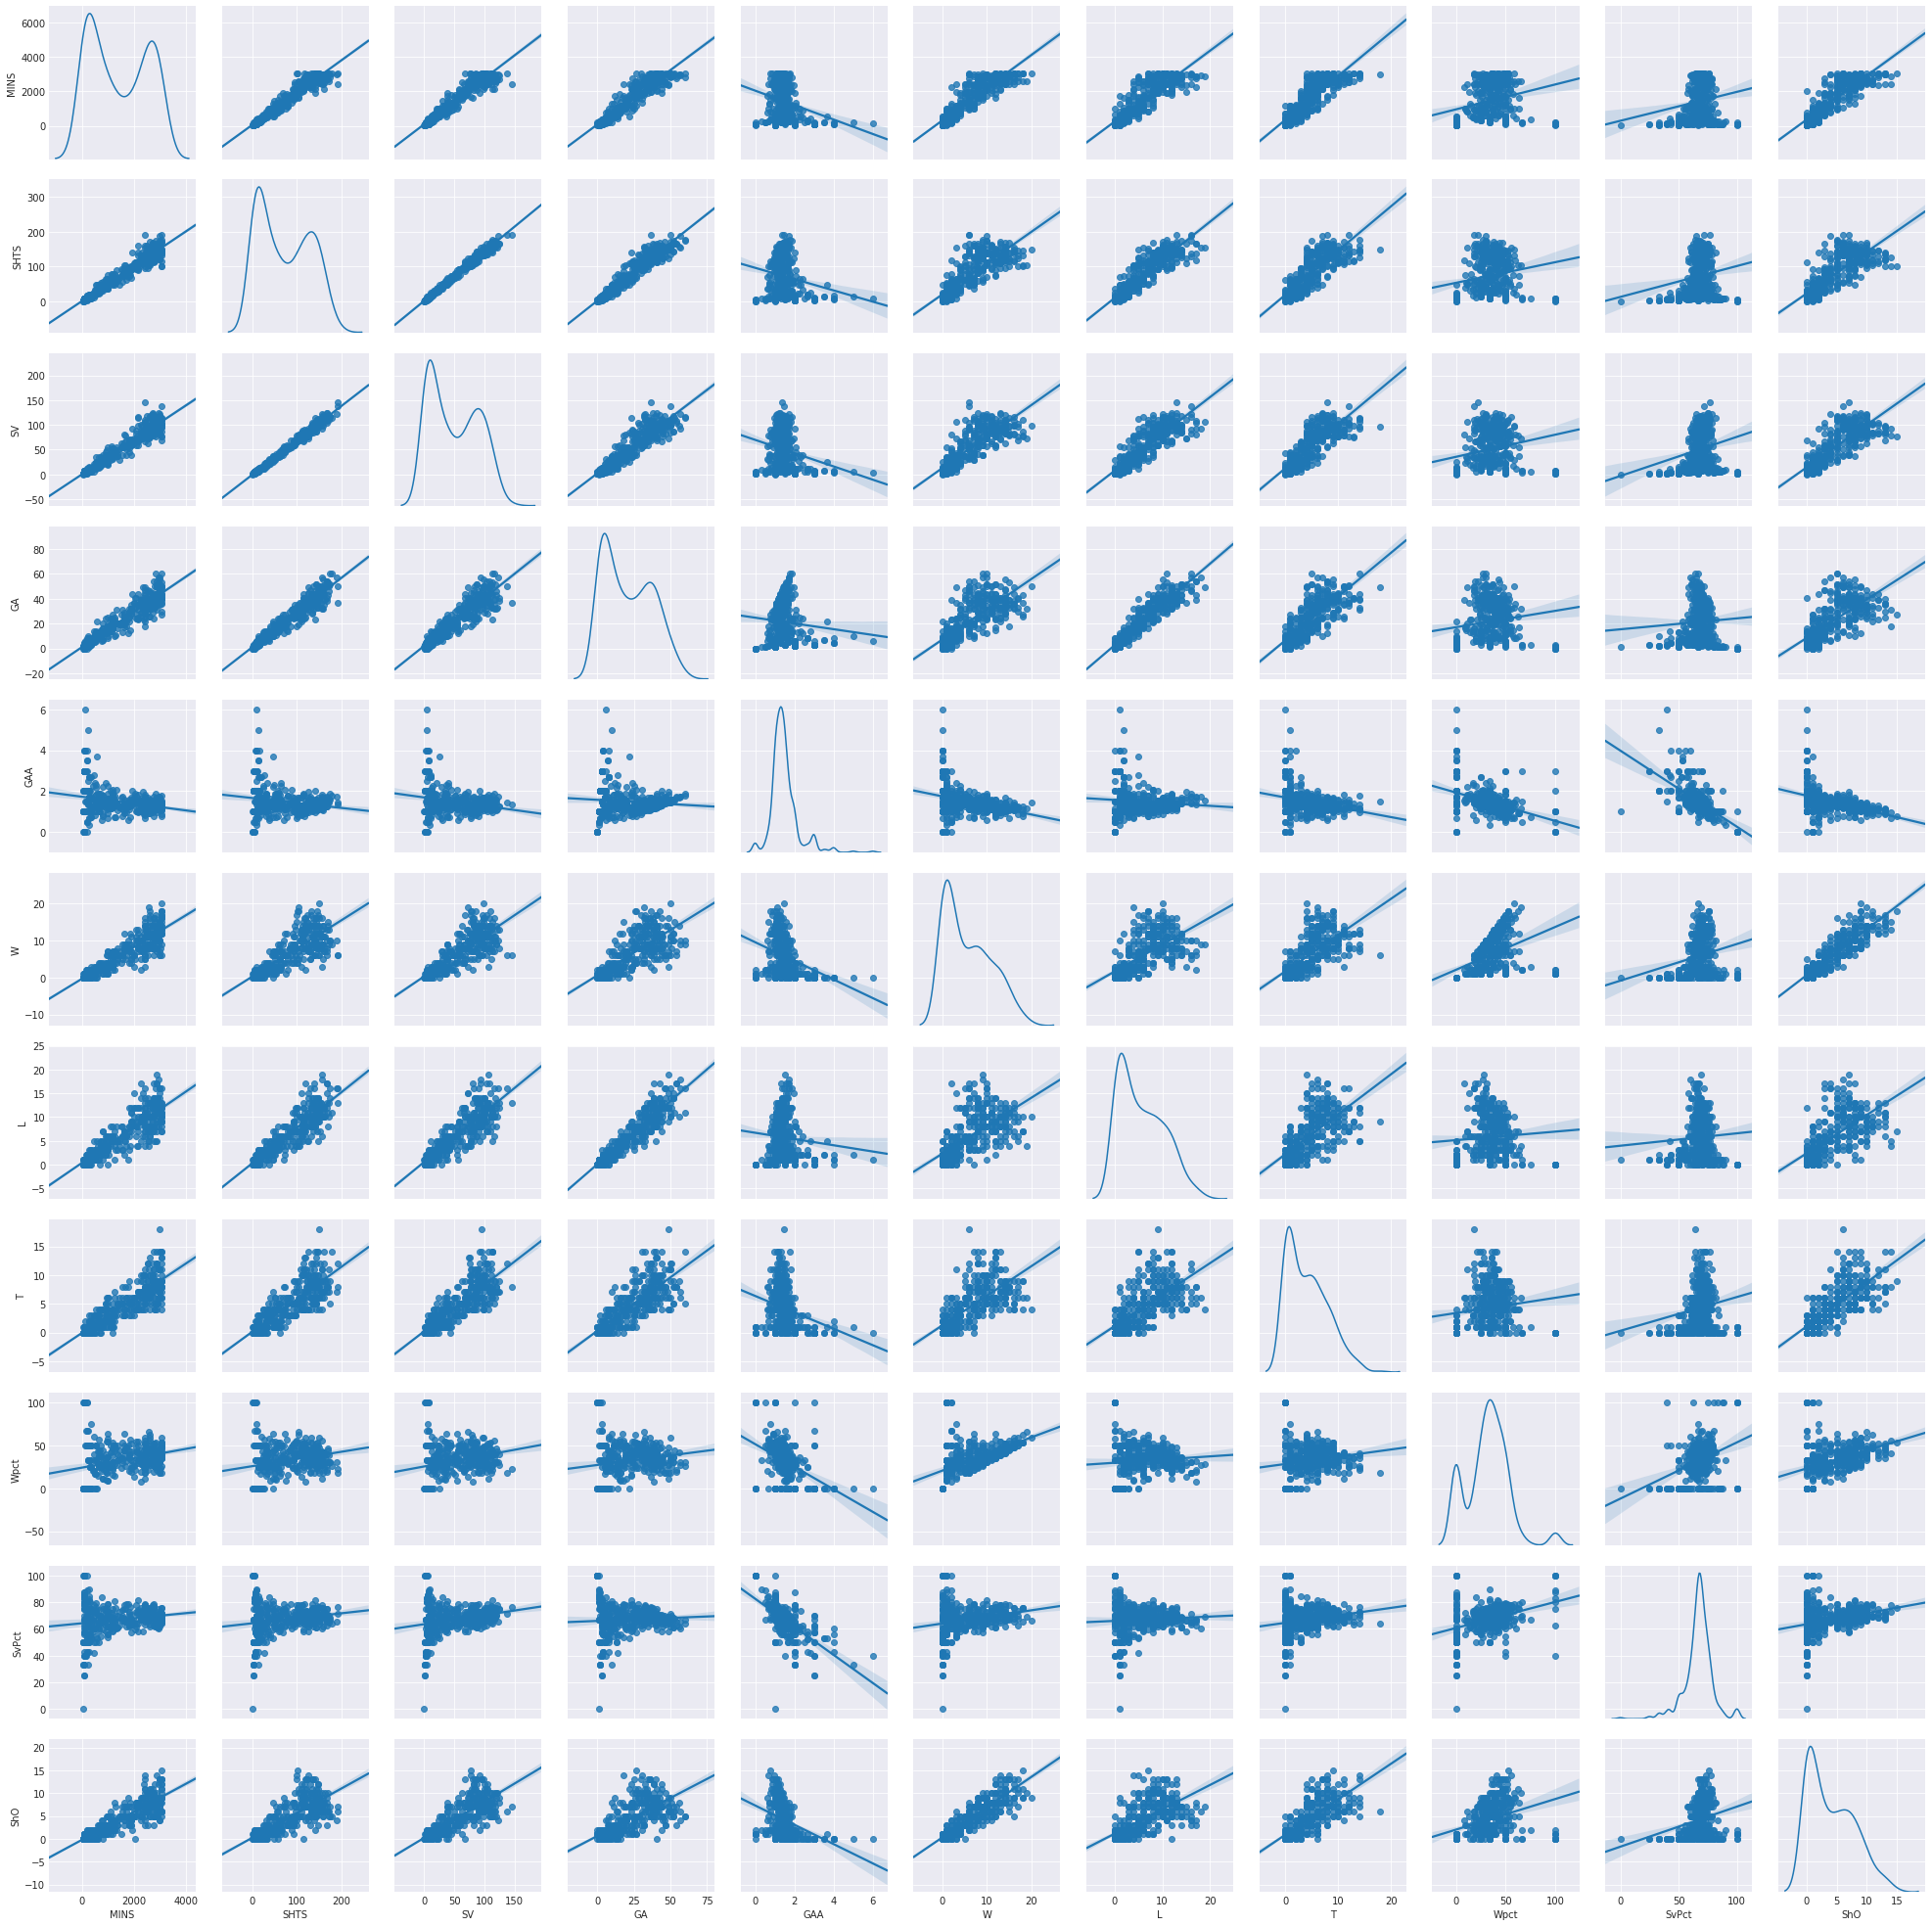

In [323]:
sns.pairplot(X.join(y), diag_kind="kde", kind='reg')

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


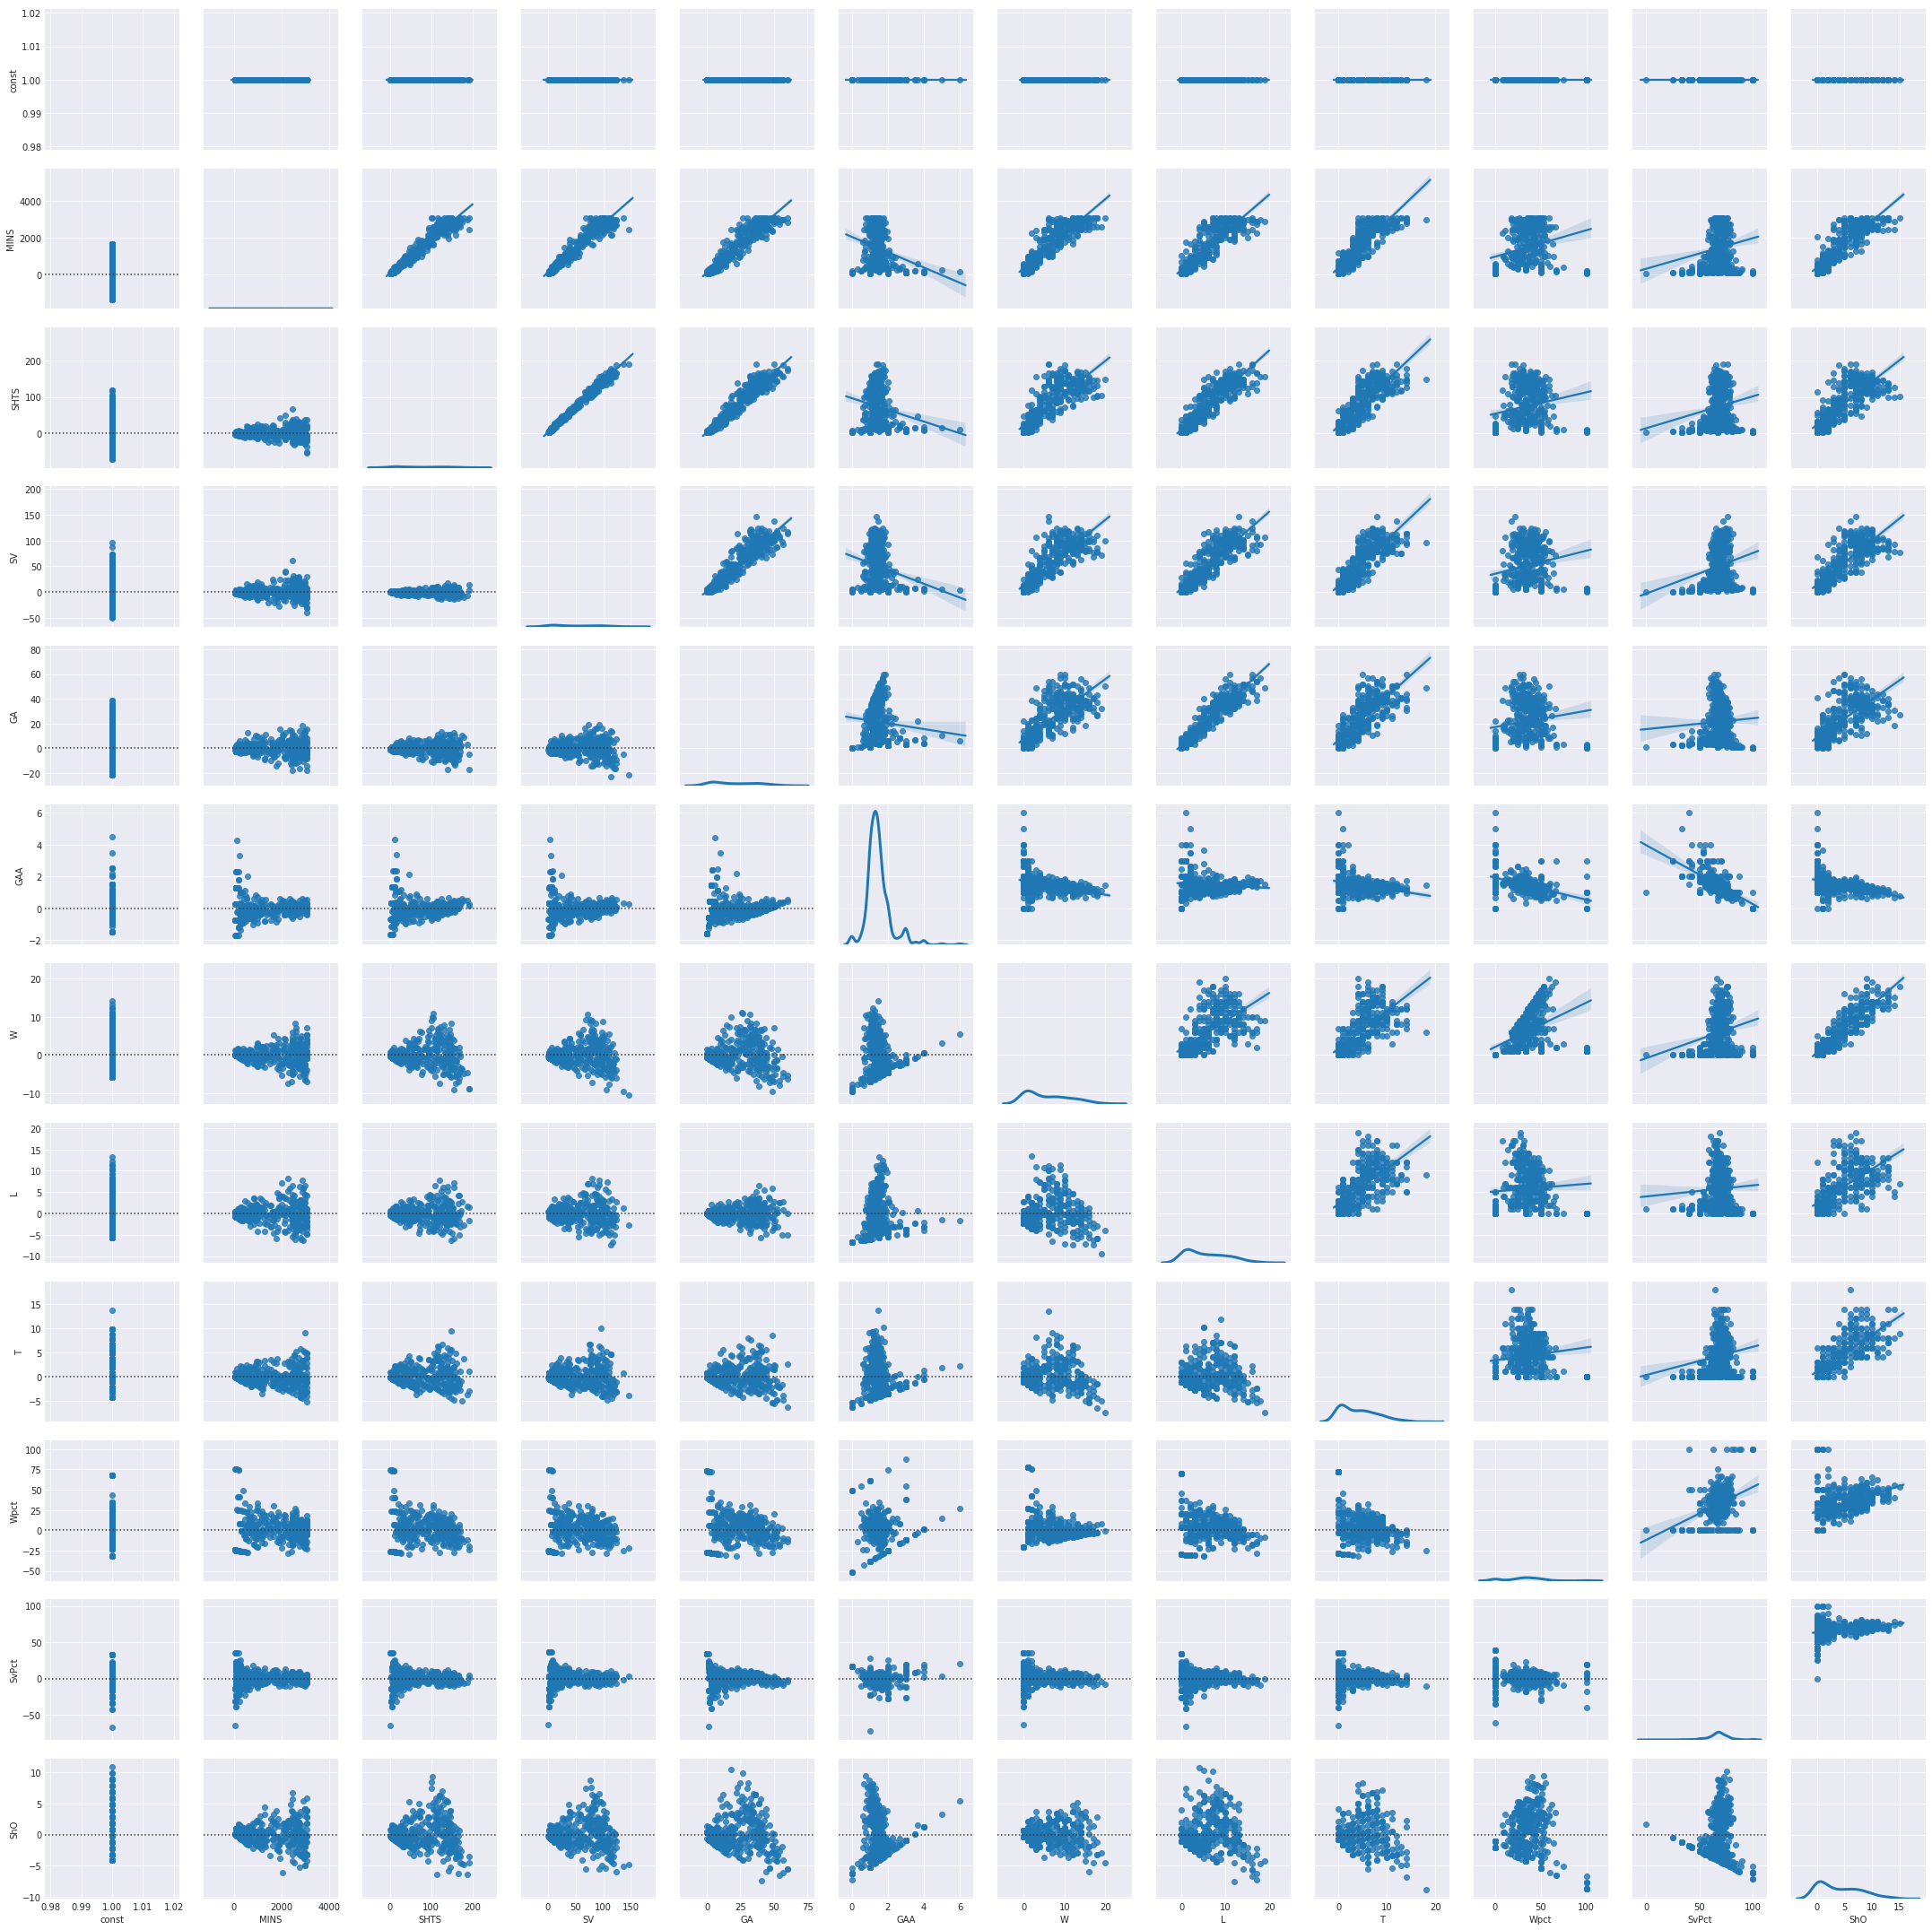

In [342]:
g = sns.PairGrid(X.join(y)) 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(sns.kdeplot, lw=3, legend=False) 

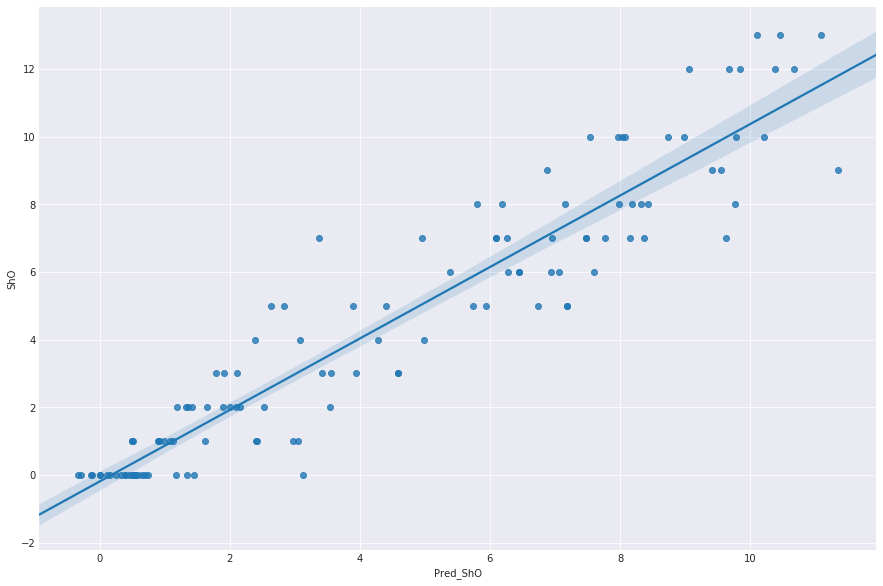

In [319]:
plt.figure(num=None, figsize=(15, 10))
sns.regplot(yhat, y_test);

In [294]:
corr3 = X.join(y).corr()
corr3

GP        GS      MINS      SHTS        SV        GA       GAA         W         L         T      Wpct     SvPct       ShO
GP     1.000000  0.999543  0.999722  0.980768  0.975270  0.964837  0.337089  0.932196  0.919522  0.915637  0.562442  0.617820  0.916597
GS     0.999543  1.000000  0.999773  0.980508  0.975222  0.964269  0.326630  0.932432  0.919478  0.914943  0.559635  0.611754  0.917490
MINS   0.999722  0.999773  1.000000  0.980870  0.975412  0.964940  0.330592  0.932357  0.920100  0.915622  0.560245  0.612860  0.917143
SHTS   0.980768  0.980508  0.980870  1.000000  0.996023  0.976564  0.361467  0.882211  0.938328  0.897061  0.523499  0.611160  0.863104
SV     0.975270  0.975222  0.975412  0.996023  1.000000  0.955098  0.336058  0.887589  0.919060  0.895876  0.529523  0.615095  0.876439
GA     0.964837  0.964269  0.964940  0.976564  0.955098  1.000000  0.414889  0.844918  0.956840  0.870695  0.493190  0.585830  0.805051
GAA    0.337089  0.326630  0.330592  0.361467  0.336058  0.414889  1.000000  0.241370  0.397414  0.282332  0.302859  0.629874  0.207376
W      0.932196  0.932432  0.932357  0.882211  0.887589  0.844918  0.241370  1.000000  0.762253  0.796327  0.654117  0.569654  0.934171
L      0.919522  0.919478  0.920100  0.938328  0.919060  0.956840  0.397414  0.762253  1.000000  0.779423  0.425661  0.566147  0.760157
T      0.915637  0.914943  0.915622  0.897061  0.895876  0.870695  0.282332  0.796327  0.779423  1.000000  0.448391  0.562416  0.837524
Wpct   0.562442  0.559635  0.560245  0.523499  0.529523  0.493190  0.302859  0.654117  0.425661  0.448391  1.000000  0.702439  0.586821
SvPct  0.617820  0.611754  0.612860  0.611160  0.615095  0.585830  0.629874  0.569654  0.566147  0.562416  0.702439  1.000000  0.573380
ShO    0.916597  0.917490  0.917143  0.863104  0.876439  0.805051  0.207376  0.934171  0.760157  0.837524  0.586821  0.573380  1.000000

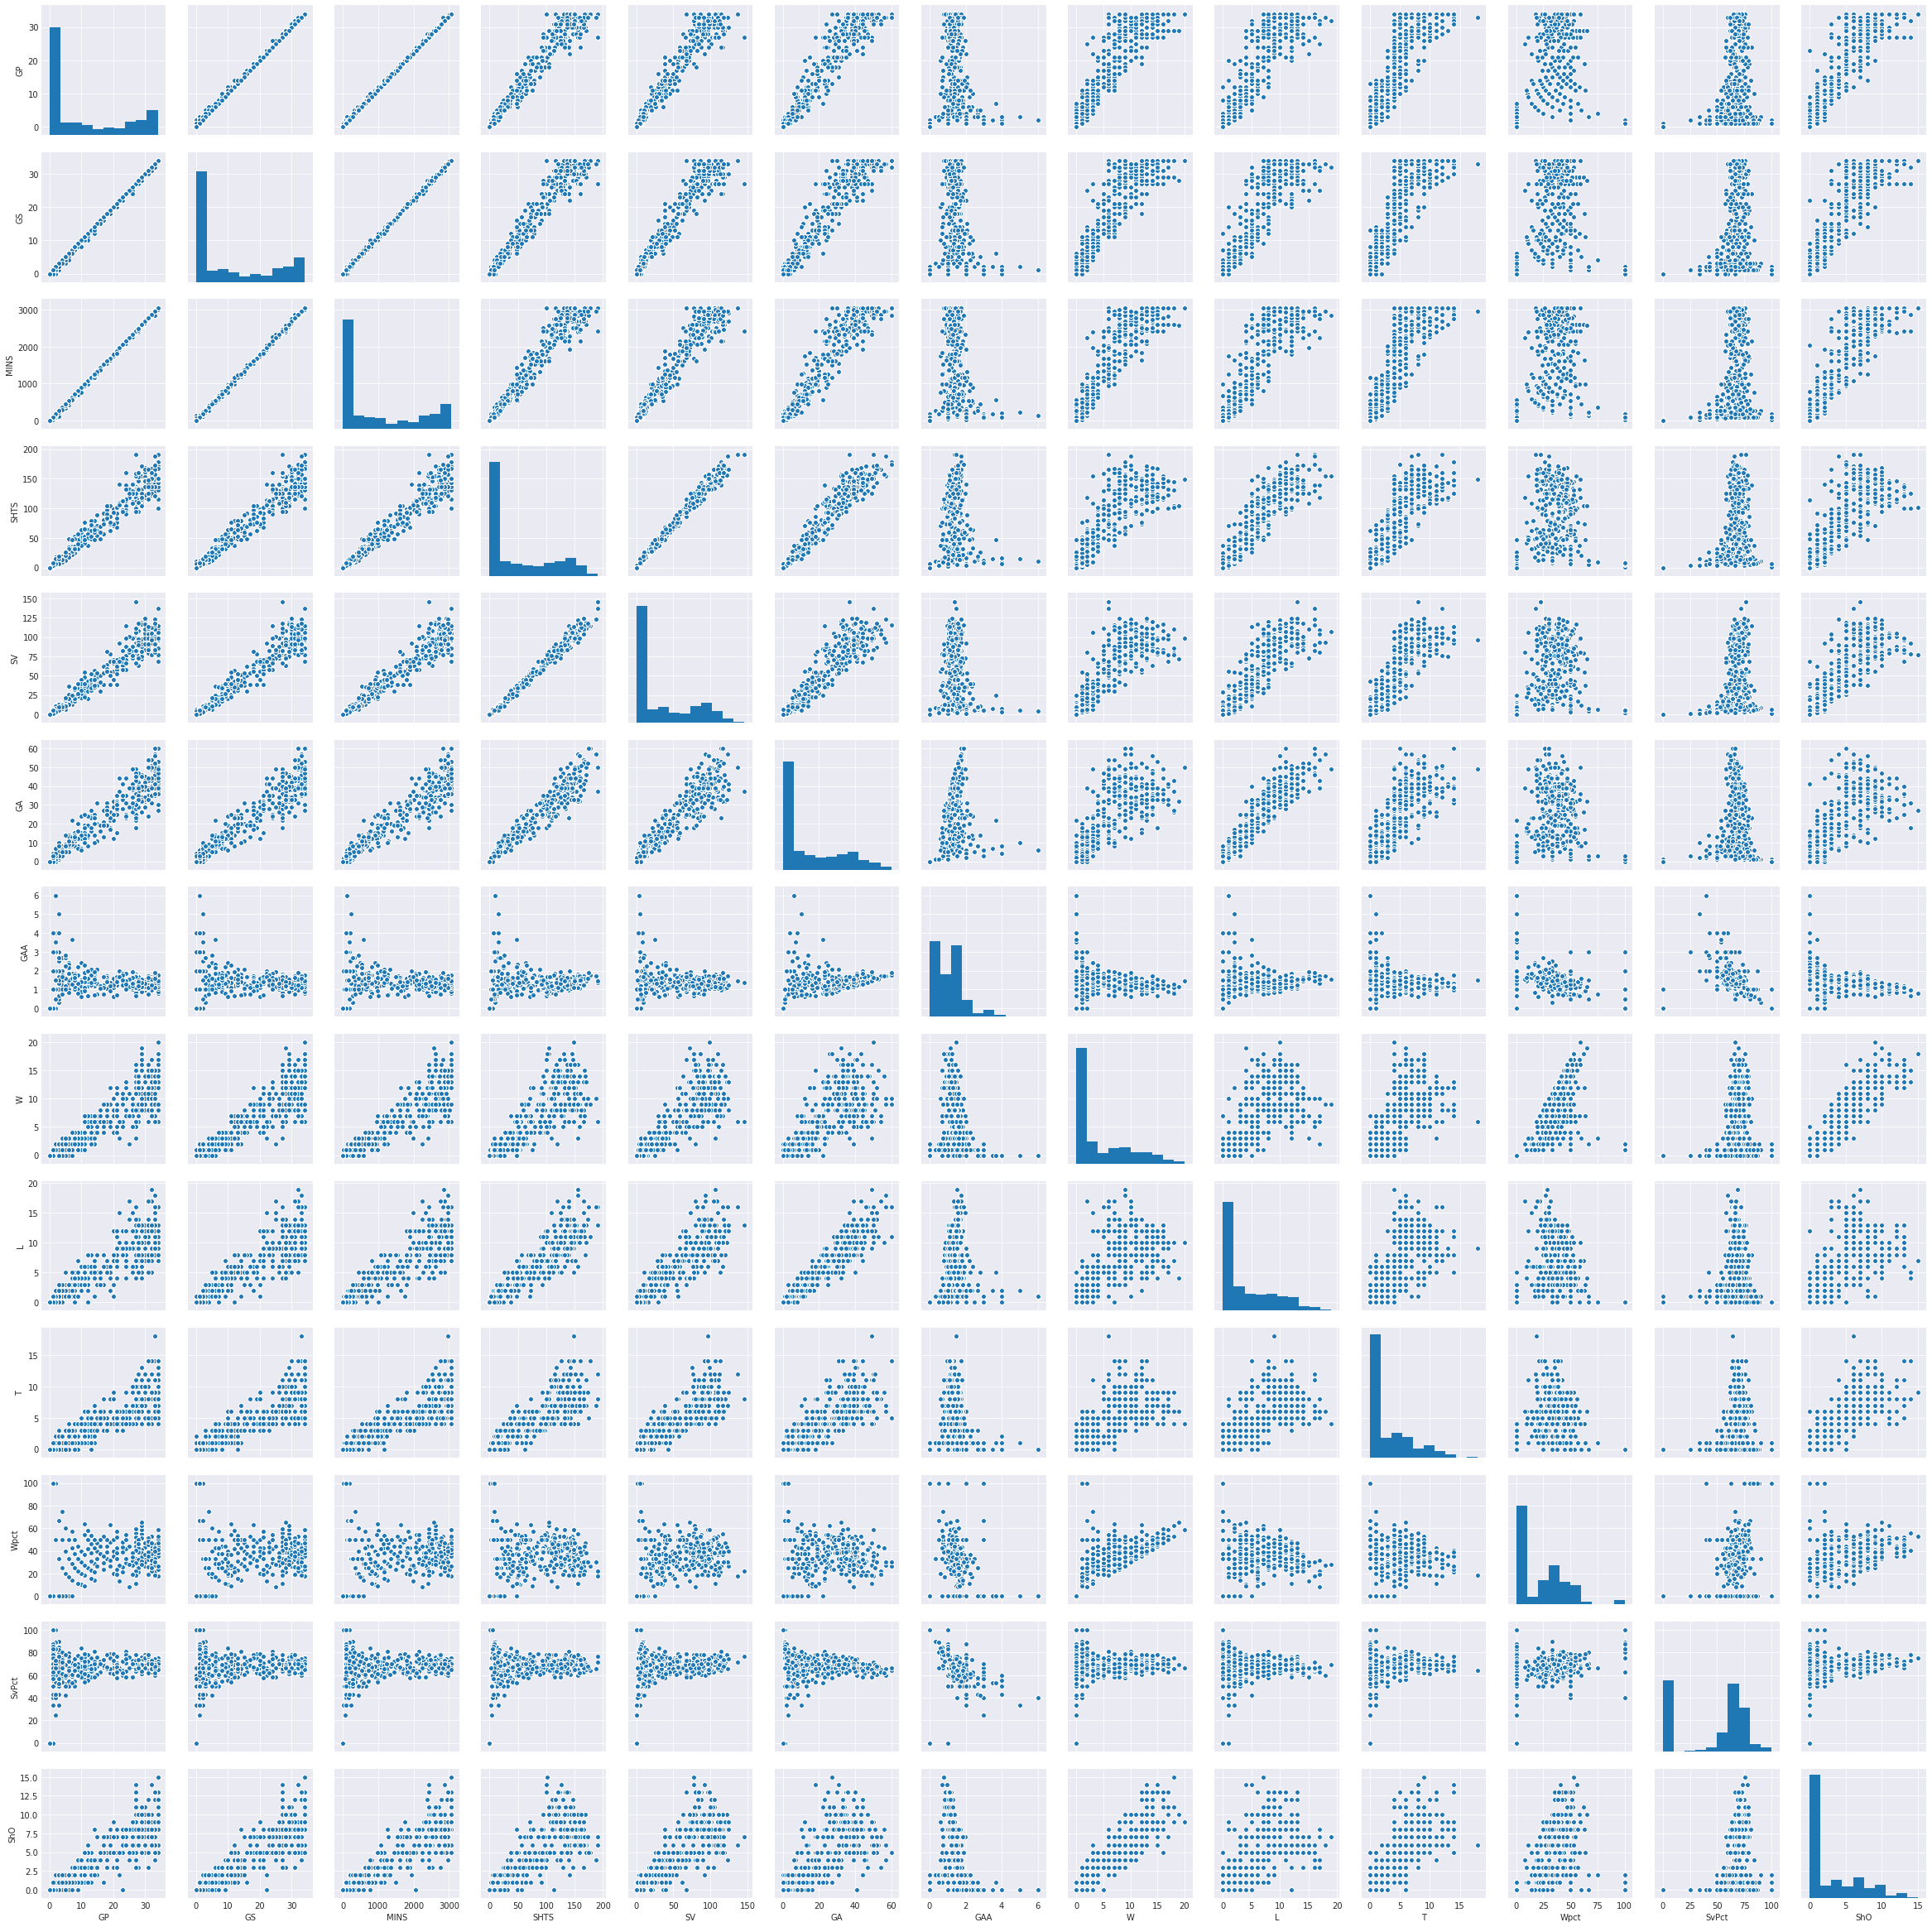

In [274]:
sns.pairplot(X.join(y))

In [275]:
# 
alphas = np.logspace(-9, 9, num=19)
rscores = np.zeros(len(alphas))
lscores = np.zeros(len(alphas))
escores = np.zeros(len(alphas))
for ii, a in enumerate(alphas):    
    # RidgeCV
    rcv = RidgeCV(cv=10, alphas=[a], fit_intercept=True)
    rcv.fit(X, y)
    rscores[ii] = rcv.score(X, y)
    # LassoCV
    lcv = LassoCV(cv=10, alphas=[a], fit_intercept=True)
    lcv.fit(X, y)
    lscores[ii] = lcv.score(X, y)    
    # ElasticNetCV
    ecv = ElasticNetCV(cv=10, alphas=[a], l1_ratio=0.5, fit_intercept=True)
    ecv.fit(X, y)
    escores[ii] = ecv.score(X, y)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

In [276]:
np.array([alphas, rscores, lscores, escores]).T

array([[  1.00000000e-09,   9.37361568e-01,   9.36345335e-01,
          9.36345335e-01],
       [  1.00000000e-08,   9.37361568e-01,   9.36345335e-01,
          9.36345335e-01],
       [  1.00000000e-07,   9.37361568e-01,   9.36345335e-01,
          9.36345335e-01],
       [  1.00000000e-06,   9.37361568e-01,   9.36345337e-01,
          9.36345335e-01],
       [  1.00000000e-05,   9.37361568e-01,   9.36345353e-01,
          9.36345334e-01],
       [  1.00000000e-04,   9.37361568e-01,   9.36345483e-01,
          9.36345312e-01],
       [  1.00000000e-03,   9.37361568e-01,   9.36344069e-01,
          9.36344106e-01],
       [  1.00000000e-02,   9.37361568e-01,   9.36164141e-01,
          9.36246842e-01],
       [  1.00000000e-01,   9.37361565e-01,   9.36478999e-01,
          9.36762701e-01],
       [  1.00000000e+00,   9.37361275e-01,   9.30330000e-01,
          9.32921701e-01],
       [  1.00000000e+01,   9.37348249e-01,   8.41145334e-01,
          8.60066671e-01],
       [  1.00000000e

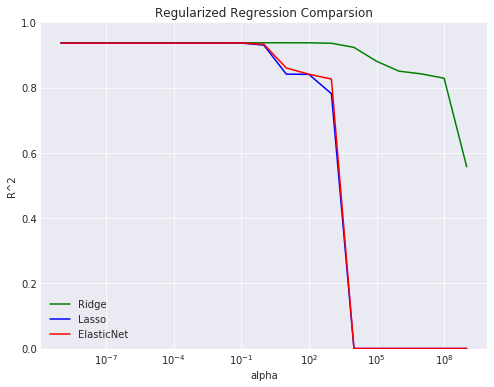

In [277]:
# Plot the alpha vs. scores
plt.figure(figsize=(8,6))
plt.semilogx(alphas, rscores, color='g', label='Ridge')
plt.semilogx(alphas, lscores, color='b', label='Lasso')
plt.semilogx(alphas, escores, color='r', label='ElasticNet')
plt.ylim((0.0, 1e0))
plt.ylabel('R^2')
plt.xlabel('alpha')
plt.title('Regularized Regression Comparsion')
plt.legend(loc='lower left')

In [278]:
lr = Ridge(alpha=100, fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.14406179188083135

In [263]:
coef = {}
for idx, c in enumerate(X.columns):
    coef[c] = lr.coef_[idx]

In [264]:
coef

{'GA': -0.22682438183536108,
 'GAA': 0.02137319637474806,
 'GP': 0.2176048412234064,
 'GS': 0.12529333183704799,
 'L': 0.22906190357839451,
 'MINS': 6.6478794711360991e-05,
 'SHTS': -0.010088681501852435,
 'SV': 0.0056666887843321977,
 'SvPct': -9.8249969709893808e-06,
 'T': 0.17119109334698351,
 'W': 0.32054221696298651,
 'Wpct': -0.0010191911173376409,
 'Year': -2.09709919853175e-06}

In [257]:
lr = Lasso(alpha=0.01, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.93188146949883355

In [261]:
lr = ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.93190036085085026